In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [2]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [3]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [4]:
ncbi_mapping = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
)

In [5]:
maize_og = get_ncbi_clean_og2gene_for_species(
    4577 , og_groups, ncbi_mapping=ncbi_mapping
)

In [6]:
sorg_og = get_ncbi_clean_og2gene_for_species(
    4558, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15624 [00:00<?, ?it/s]

In [7]:
maize_og

,maize OrthoGene,Orthogroup,Symbol
0,4577_0:004254,100007at3193,Zm00001d017285
1,4577_0:004e43,100007at3193,LOC100275058
2,4577_0:002a40,10009at3193,LOC103650270
3,4577_0:0055c7,100242at3193,Zm00001d036270
4,4577_0:00571d,100242at3193,Zm00001d036267
...,...,...,...
29980,4577_0:000740,99460at3193,LOC100275919
29981,4577_0:000d05,9959at3193,Zm00001d010566
29982,4577_0:002b38,9959at3193,LOC100192600
29983,4577_0:004be5,9959at3193,LOC103625771


In [8]:
sorg_og

,sorghum OrthoGene,Orthogroup,Symbol
0,4558_0:003a4f,100007at3193,LOC110434333
1,4558_0:00439a,100067at3193,LOC8071983
2,4558_0:002fd8,100085at3193,LOC8086335
3,4558_0:0066a3,100242at3193,LOC8071368
4,4558_0:000f6e,10051at3193,LOC8080530
...,...,...,...
26200,4558_0:00133d,99586at3193,LOC8077449
26201,4558_0:001dcf,99586at3193,LOC8077446
26202,4558_0:0006b0,9959at3193,LOC8057378
26203,4558_0:002462,9959at3193,LOC8085434


In [9]:
list_of_non_single_gene_groups_maize = pd.Series(maize_og['Orthogroup'].value_counts().loc[maize_og['Orthogroup'].value_counts() >1])

In [10]:
list_of_non_single_gene_groups_sorg = pd.Series(sorg_og['Orthogroup'].value_counts().loc[sorg_og['Orthogroup'].value_counts() >1])

In [11]:
list_of_non_single_gene_groups_sorg

Orthogroup
84321at3193     37
360824at3193    31
85931at3193     29
29968at3193     26
106700at3193    25
                ..
131019at3193     2
768929at3193     2
131044at3193     2
130958at3193     2
883605at3193     2
Name: count, Length: 5246, dtype: int64

In [12]:
list_of_non_single_gene_groups_maize

Orthogroup
334151at3193    61
83993at3193     52
942820at3193    33
78311at3193     31
227973at3193    31
                ..
104520at3193     2
10493at3193      2
105017at3193     2
103637at3193     2
103928at3193     2
Name: count, Length: 6861, dtype: int64

In [13]:
maize_og = maize_og.loc[maize_og['Orthogroup'].isin(list_of_non_single_gene_groups_maize.index)]

In [14]:
sorg_og = sorg_og.loc[sorg_og['Orthogroup'].isin(list_of_non_single_gene_groups_sorg.index)]

In [15]:
sorg_og

,sorghum OrthoGene,Orthogroup,Symbol
4,4558_0:000f6e,10051at3193,LOC8080530
5,4558_0:0014a0,10051at3193,LOC8084266
6,4558_0:002bd3,10051at3193,LOC8082194
7,4558_0:004624,10051at3193,LOC8074749
10,4558_0:00157c,100637at3193,LOC8059772
...,...,...,...
26200,4558_0:00133d,99586at3193,LOC8077449
26201,4558_0:001dcf,99586at3193,LOC8077446
26202,4558_0:0006b0,9959at3193,LOC8057378
26203,4558_0:002462,9959at3193,LOC8085434


In [16]:
sorg_csv = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_reads.csv', index_col = 0)
sorg_csv = sorg_csv.T
sorg_csv

,Sorg Cold Rep 1,Sorg Cold Rep 2,Sorg Cold Rep 3,Sorg Hot Rep 1,Sorg Hot Rep 2,Sorg Hot Rep 3
LOC8059226,931,1145,859,900,846,806
LOC110434520,137,113,137,137,116,121
LOC8059546,1003,2023,1036,485,452,391
LOC8059547,565,721,502,580,420,482
LOC8059227,2561,2755,2365,2873,2613,2859
...,...,...,...,...,...,...
LOC8155598,285,341,304,339,310,312
SobioMr01,4911,5462,3859,4515,3983,4099
SobioMr02,1100,1228,1298,1102,946,1089
SobioMp23,15,19,10,10,23,25


In [17]:
dict_version = sorg_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
sorg_csv = sorg_csv.groupby(by = true_dict).mean()

In [18]:
sorg_csv

,Sorg Cold Rep 1,Sorg Cold Rep 2,Sorg Cold Rep 3,Sorg Hot Rep 1,Sorg Hot Rep 2,Sorg Hot Rep 3
10051at3193,127.000000,124.000000,98.000000,133.000000,122.000000,126.000000
10217at3193,484.666667,548.000000,432.666667,572.000000,468.666667,510.333333
102571at3193,46.000000,98.000000,90.000000,27.000000,25.000000,23.000000
104297at3193,120.000000,160.000000,80.000000,79.000000,58.000000,32.500000
104524at3193,290.000000,424.000000,339.000000,306.000000,257.000000,167.000000
...,...,...,...,...,...,...
9705at3193,41.000000,86.000000,58.000000,62.000000,62.000000,64.000000
9789at3193,1048.500000,1367.500000,1176.000000,1467.500000,1354.500000,1273.500000
9797at3193,571.000000,1194.000000,1339.000000,1751.000000,2002.000000,1428.000000
9942at3193,3773.000000,4544.333333,3559.666667,3597.000000,3232.000000,3054.333333


In [19]:
sorg_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "Sorg Cold Rep 1",
        "Sorg Cold Rep 2",
        "Sorg Cold Rep 3",
        "Sorg Hot Rep 1",
        "Sorg Hot Rep 2",
        "Sorg Hot Rep 3",
    ],
)

In [20]:
combined_maize = pd.read_csv("/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_reads.csv", index_col = 0)
combined_maize = combined_maize.T
combined_maize


,maize Hot Rep 1,maize Hot Rep 2,maize Hot Rep 3,maize Hot Rep 4,maize Cold Rep 1,maize Cold Rep 2,maize Cold Rep 3,maize Cold Rep 4
Zm00001d000055,333,440,248,522,524,353,185,346
Zm00001d000071,12,21,4,24,23,8,4,9
Zm00001d000072,82,97,56,145,84,56,43,49
Zm00001d000298,68,48,90,406,29,24,32,25
Zm00001d000299,713,822,449,856,836,775,556,677
...,...,...,...,...,...,...,...,...
Zm00001d048570,121,117,73,210,120,101,67,83
Zm00001d048573,94,106,63,210,88,76,65,90
Zm00001d048574,1829,1971,1188,2745,2982,1589,1343,1646
Zm00001d048575,1418,1306,257,331,471,353,244,138


In [21]:
dict_version = maize_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_maize = combined_maize.groupby(by = true_dict).mean()
combined_maize

,maize Hot Rep 1,maize Hot Rep 2,maize Hot Rep 3,maize Hot Rep 4,maize Cold Rep 1,maize Cold Rep 2,maize Cold Rep 3,maize Cold Rep 4
10077at3193,108.000000,114.000000,81.000000,178.0,248.0,100.000000,67.0,121.000000
10217at3193,287.500000,325.000000,187.500000,424.5,314.5,308.500000,247.5,247.000000
10493at3193,49.000000,43.000000,36.000000,78.0,53.0,49.000000,31.0,45.000000
10648at3193,2452.500000,2266.000000,1097.500000,2635.5,1855.5,1887.500000,1640.0,1608.500000
10653at3193,12106.000000,12847.000000,7784.000000,20804.5,16419.5,9311.000000,7235.0,10087.500000
...,...,...,...,...,...,...,...,...
97899at3193,151.500000,145.500000,105.500000,284.5,187.0,148.000000,104.0,153.000000
9789at3193,541.000000,570.500000,357.500000,970.0,510.0,352.000000,313.0,373.500000
9797at3193,51.000000,31.000000,28.000000,153.0,49.0,35.000000,29.0,38.000000
9942at3193,3520.666667,3795.333333,2195.333333,5496.0,4451.0,3321.666667,2671.0,3358.666667


In [22]:
combined_maize = combined_maize.T
sorg_csv = sorg_csv.T

In [23]:
maize_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot", "Hot","Cold","Cold", "Cold", "Cold"],
    index=[
        "maize Hot Rep 1",
        "maize Hot Rep 2",
        "maize Hot Rep 3",
        "maize Hot Rep 4",
        "maize Cold Rep 1",
        "maize Cold Rep 2",
        "maize Cold Rep 3",
        "maize Cold Rep 4"
    ],
)

In [24]:
combined_maize = combined_maize.round(0)
sorg_csv = sorg_csv.round(0)

In [25]:
genes_to_keep_sorg = sorg_csv.columns[sorg_csv.sum(axis=0) >= 100]
sorg_csv = sorg_csv[genes_to_keep_sorg]
inference_sorg = DefaultInference(n_cpus=30)
dds_sorg = DeseqDataSet(
    counts=sorg_csv,
    metadata=sorg_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_sorg,
)
dds_sorg.deseq2()
stat_res_sorg = DeseqStats(dds_sorg, inference=inference_sorg)
stat_res_sorg.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.47 seconds.

Fitting dispersion trend curve...
... done in 0.12 seconds.

Fitting MAP dispersions...
... done in 0.43 seconds.

Fitting LFCs...
... done in 0.37 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10051at3193    121.500646        0.098763  0.201265  0.490710  0.623631   
10217at3193    500.454918        0.054831  0.117757  0.465624  0.641484   
102571at3193    51.046455       -1.651657  0.346492 -4.766795  0.000002   
104297at3193    86.993778       -1.115678  0.327053 -3.411305  0.000647   
104524at3193   294.412264       -0.553607  0.198681 -2.786419  0.005329   
...                   ...             ...       ...       ...       ...   
9705at3193      61.437688        0.023525  0.286117  0.082222  0.934471   
9789at3193    1274.388025        0.168016  0.091883  1.828594  0.067460   
9797at3193    1371.992557        0.728854  0.251971  2.892605  0.003821   
9942at3193    3611.103502       -0.288193  0.082595 -3.489252  0.000484   
9959at3193    2761.950579       -0.319124  0.108642 -2.937388  0.003310   

                  padj  
10051at3193   0.775

... done in 0.37 seconds.



In [26]:
genes_to_keep = combined_maize.columns[combined_maize.sum(axis=0) >= 100]
combined_maize = combined_maize[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds_maize = DeseqDataSet(
    counts=combined_maize,
    metadata=maize_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_maize.deseq2()
stat_res_maize = DeseqStats(dds_maize, inference=inference)
stat_res_maize.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.51 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting LFCs...
... done in 0.33 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10077at3193    120.135696       -0.319990  0.224932 -1.422608  1.548497e-01   
10217at3193    288.475068       -0.145039  0.152624 -0.950305  3.419571e-01   
10493at3193     46.824601       -0.043082  0.237494 -0.181403  8.560515e-01   
10648at3193   1901.086442       -0.023699  0.181959 -0.130246  8.963720e-01   
10653at3193  11420.863573        0.074602  0.080454  0.927264  3.537893e-01   
...                   ...             ...       ...       ...           ...   
97899at3193    153.583462       -0.058115  0.153068 -0.379665  7.041939e-01   
9789at3193     472.284900        0.376672  0.101837  3.698771  2.166460e-04   
9797at3193      46.154756        0.401132  0.373458  1.074102  2.827771e-01   
9942at3193    3490.839982       -0.146726  0.068008 -2.157474  3.096876e-02   
9959at3193    3691.324807       -0.760722  0.087957 -8.648812  5.203851e-18 

... done in 0.29 seconds.



In [27]:
full_results_maize = stat_res_maize.results_df
full_results_maize
full_sorg_results = stat_res_sorg.results_df

In [28]:
#full_results_maize.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_ortho_trimmed_out_2_gene_families.csv')
#full_sorg_results.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_ortho_trimmed_out_2_gene_families.csv')


In [30]:
random_species_1 = maize_og.copy()
random_species_2 = sorg_og.copy()

species_1_metadata = maize_metadata.copy()
species_2_metadata = sorg_metadata.copy()

species_1_csv = pd.read_csv("/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_reads.csv", index_col = 0)
species_1_csv = species_1_csv.T

species_2_csv = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_reads.csv', index_col = 0)
species_2_csv = species_2_csv.T


random_species_1 ['Symbol'] = random_species_1['Symbol'].sample(frac = 1).values
random_species_2 ['Symbol'] = random_species_2['Symbol'].sample(frac = 1).values

list_of_non_single_gene_groups_species_1 =  pd.Series(random_species_1['Orthogroup'].value_counts().loc[random_species_1['Orthogroup'].value_counts() >1])
list_of_non_single_gene_groups_species_2 = pd.Series(random_species_2['Orthogroup'].value_counts().loc[random_species_2['Orthogroup'].value_counts() > 1])
random_species_1 = random_species_1.loc[random_species_1['Orthogroup'].isin(list_of_non_single_gene_groups_species_1.index)]
random_species_2 = random_species_2.loc[random_species_2['Orthogroup'].isin(list_of_non_single_gene_groups_species_2.index)]

dict_version_species_1 = random_species_1[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict_species_1 = dict_version_species_1['Orthogroup']
combined_species_1 = species_1_csv.groupby(by = true_dict_species_1).mean()

dict_version_species_2 = random_species_2[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict_species_2 = dict_version_species_2['Orthogroup']
combined_species_2 = species_2_csv.groupby(by = true_dict_species_2).mean()

combined_species_1 = combined_species_1.T
combined_species_2 = combined_species_2.T

combined_species_1 = combined_species_1.round(0)
combined_species_2 = combined_species_2.round(0)

genes_to_keep_species_1 = combined_species_1.columns[combined_species_1.sum(axis=0) >= 100]
combined_species_1 = combined_species_1[genes_to_keep_species_1]
inference = DefaultInference(n_cpus=30)
dds_species_1 = DeseqDataSet(
    counts=combined_species_1,
    metadata=species_1_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_species_1.deseq2()
stat_res_species_1 = DeseqStats(dds_species_1, inference=inference)
stat_res_species_1.summary()

genes_to_keep_species_2 = combined_species_2.columns[combined_species_2.sum(axis=0) >= 100]
combined_species_2 = combined_species_2[genes_to_keep_species_2]
inference = DefaultInference(n_cpus=30)
dds_species_2 = DeseqDataSet(
    counts=combined_species_2,
    metadata=species_2_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_species_2.deseq2()
stat_res_species_2 = DeseqStats(dds_species_2, inference=inference)
stat_res_species_2.summary()

full_results_species_1 = stat_res_species_1.results_df
full_results_species_2 = stat_res_species_2.results_df

full_results_species_1.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_random_ortho.csv')
full_results_species_2.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_random_ortho.csv')

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.40 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 0.57 seconds.

Fitting LFCs...
... done in 0.40 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.35 seconds.



Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
100007at3193   577.266259        0.351454  0.193727  1.814176  6.965057e-02   
100242at3193  1548.549754        0.218689  0.071506  3.058341  2.225659e-03   
10077at3193   1478.290381        0.127927  0.075557  1.693129  9.043094e-02   
101638at3193  2183.075684       -0.415334  0.056005 -7.416032  1.206812e-13   
10179at3193    535.472772        0.112030  0.087581  1.279159  2.008412e-01   
...                   ...             ...       ...       ...           ...   
9789at3193      20.638198        0.129804  0.357792  0.362791  7.167611e-01   
9797at3193     861.388536       -0.121866  0.074281 -1.640599  1.008806e-01   
9942at3193     350.039194       -0.639779  0.121784 -5.253394  1.493213e-07   
99460at3193    135.859131        0.119384  0.161029  0.741384  4.584605e-01   
9959at3193     439.167673        0.039969  0.140901  0.283663  7.766683e-01 

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.38 seconds.

Fitting dispersion trend curve...
... done in 0.16 seconds.

Fitting MAP dispersions...
... done in 0.39 seconds.

Fitting LFCs...
... done in 0.42 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10051at3193    227.373534        0.157538  0.144405  1.090941  2.752988e-01   
100637at3193    83.341087        0.281570  0.233194  1.207452  2.272581e-01   
1018at3193    1176.303798        0.165898  0.093103  1.781878  7.476919e-02   
102118at3193   116.881047       -0.456505  0.231604 -1.971053  4.871783e-02   
10217at3193    272.958532       -0.127843  0.137844 -0.927447  3.536947e-01   
...                   ...             ...       ...       ...           ...   
9789at3193    2576.384349       -0.632229  0.088846 -7.115991  1.111118e-12   
9797at3193     607.429676        0.165198  0.113113  1.460470  1.441610e-01   
9942at3193     384.377070        0.377720  0.139982  2.698348  6.968452e-03   
99586at3193    729.038833       -0.038637  0.108613 -0.355729  7.220438e-01   
9959at3193    1926.391437        0.677638  0.138432  4.895088  9.826184e-07 

... done in 0.27 seconds.



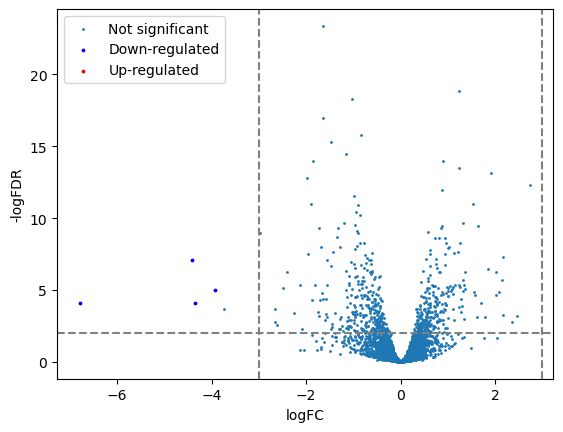

In [29]:
plt.scatter(
    x=full_sorg_results["log2FoldChange"],
    y=full_sorg_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] <= -3)
    & (full_sorg_results["padj"] <= 0.0001)
]
up_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] >= 3) & (full_sorg_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_sorg["log2FoldChange"],
    y=down_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_sorg["log2FoldChange"],
    y=up_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [30]:
up_sorg

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj


In [31]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

NameError: name 'full_results' is not defined

In [ ]:
up